<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad04/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DEL DATASET CAR PRICE**
## **Extraccion de conocimientos de base de datos**
## **Romero Sosa Emma Yuridia**
## **IDGS 91** 


---



In [980]:
!pip install fuzzywuzzy

# **Librerías**

In [981]:
import numpy as np
import pandas as pd
#librerias para crear graficos
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Librerias para valores que coinciden
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# **Cargar dataset**


In [982]:
#Cargar dataset desde github
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad04/car_price_assignment.csv
dfcar_price = pd.read_csv("car_price_assignment.csv",delimiter=',',header='infer')

--2021-10-24 07:04:19--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad04/car_price_assignment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘car_price_assignment.csv.43’

car_price_assignmen 100%[===================>]  26.09K  --.-KB/s    in 0.001s  

2021-10-24 07:04:20 (19.7 MB/s) - ‘car_price_assignment.csv.43’ saved [26717/26717]



In [983]:
#Mostrar los primeros 5 datos
dfcar_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [984]:
# Obtener forma del DataFrame
dfcar_price.shape


(205, 26)

In [985]:
# Obtener información del DataFrame
dfcar_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# **Funciones**

## **Funciones para la limpieza de datos**

In [986]:
# Función para conocer los valores unicos de las columnas.
def uniqueData(df, col):
  # Obtener todos los valores unicos en la columna
  lista_unica = df[col].unique()

  # sort them alphabetically and then take a closer look
  lista_unica.sort()
  print("Columna: ", col)
  print("No. columnas unicas: ", lista_unica.size)
  print("Valores unicos: ", lista_unica)


In [987]:
#funcion para convertir valores a minusculas y eliminar espacios blancos al inicio y final de los valores
def correctionData(df, col):
  # Convertir los valores a minusculas de la columna CarName
  dfcar_price['CarName'] = dfcar_price['CarName'].str.lower()

  # Eliminar los espacios en blanco al inicio y final de los valores
  dfcar_price['CarName'] = dfcar_price['CarName'].str.strip()
  print("Corrección de datos realizada!")

In [988]:
# función para remplazar los valores que coincidan con un string
def replaceData(df, col, string_to_match, min_percent):
    # Obtener lista de valores unicos
    valores_unicos = df[col].unique()
    
    # Obtener las 5 coincidencias mas cercanas al string
    matches = fuzzywuzzy.process.extract(string_to_match, valores_unicos, 
                                         limit=15, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # Obtener solo los valores con coincidencia mayor a la indicada
    close_matches = [matches[0] for matches in matches if matches[1] >= min_percent]

    # Obtener las filas de los valores que coinciden
    rows_with_matches = df[col].isin(close_matches)

    # Reemplazar todas las filas de los valores que coinciden
    df.loc[rows_with_matches, col] = string_to_match
    
    #Mostrar coincidencias
    print("Con ", string_to_match, "se modificaron ", rows_with_matches.sum(), " filas, donde hubo una coincidencia mayor a ", min_percent, "%")

In [989]:
# funcion para mostrar los valores que coincidan con un string 
def matchData(df, col, string_to_match):
  # Obtener lista de valores unicos
  valores_unicos = df[col].unique()

  # Obtener las 10 coincidencias mas cercanas al string
  matches = fuzzywuzzy.process.extract(string_to_match, valores_unicos,
                                       limit=15, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
  
  #Mostrar coincidencias
  print("Coincidencias: ", matches)

## **Funciones para explorar datos**

In [990]:
#funcion para separar columnas por tipo de dato
def separateData(df):
  col_category = []
  col_number = []
  
  for col in df:
    #Separar columnas por tipo object 
    if df[col].dtype == "object":
      col_category.append(col)
    
    #Separar columnas por tipo int o float
    if df[col].dtype != "object":
      col_number.append(col)
  
  return col_category, col_number


# **Limpieza de datos**


## **Verificar datos faltantes**

In [991]:
#Obtener la suma de los valores perdidos por cada columna
datos_perdidos = dfcar_price.isnull().sum()
datos_perdidos

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## **Verificar datos duplicados**

In [992]:
#Verificar que no haya datos duplicados dentro del dataframe
dfcar_price.duplicated().sum()

0

## **Corrección de entrada de datos inconsistente**

In [993]:
# Asignar columnas de tipo object (string) para verificar los datos inconsistentes
colm = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

#Mostrar los datos unicos de cada columna
for i in range(len(colm)):
  col = colm[i]
  uniqueData(dfcar_price, col)

Columna:  CarName
No. columnas unicas:  147
Valores unicos:  ['Nissan versa' 'alfa-romero Quadrifoglio' 'alfa-romero giulia'
 'alfa-romero stelvio' 'audi 100 ls' 'audi 100ls' 'audi 4000' 'audi 5000'
 'audi 5000s (diesel)' 'audi fox' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw x4'
 'bmw x5' 'bmw z4' 'buick century' 'buick century luxus (sw)'
 'buick century special' 'buick electra 225 custom'
 'buick opel isuzu deluxe' 'buick regal sport coupe (turbo)'
 'buick skyhawk' 'buick skylark' 'chevrolet impala'
 'chevrolet monte carlo' 'chevrolet vega 2300' 'dodge challenger se'
 'dodge colt (sw)' 'dodge colt hardtop' 'dodge coronet custom'
 'dodge coronet custom (sw)' 'dodge d200' 'dodge dart custom'
 'dodge monaco (sw)' 'dodge rampage' 'honda accord' 'honda accord cvcc'
 'honda accord lx' 'honda civic' 'honda civic (auto)' 'honda civic 1300'
 'honda civic 1500 gl' 'honda civic cvcc' 'honda prelude' 'isuzu D-Max '
 'isuzu D-Max V-Cross' 'isuzu MU-X' 'jaguar xf' 'jaguar xj' 'jaguar xk'
 'maxda glc deluxe

> ### **Columna: CarName**

Podemos observar que existen algunos datos inconsistentes en la columna **CarName** como **'audi 100 ls'** y **'audi 100ls'** donde el primero cuenta con espacio entre 100 y ls, mientras que el segundo no. Otro ejemplo es con **'Nissan versa'** que comienza con mayusculas, mientras que la mayor cantidad de nombres son en minisculas 

Asi que corregimos estos datos de entrada de la siguiente forma:
* Convertimos todos los valores a minusculas.
* Eliminamos espacios en blanco al inicio y al final de los valores.
* Reemplazamos los valores que creemos que coinciden.

In [994]:
# Corregir datos
correctionData(dfcar_price, "CarName")


Corrección de datos realizada!


In [995]:
#Mostrar los datos que coinciden en la columna CarName 
matchData(dfcar_price, 'CarName', "audi 100 ls")
matchData(dfcar_price, 'CarName', "mazda glc deluxe")
matchData(dfcar_price, 'CarName', "mazda rx3")
matchData(dfcar_price, 'CarName', "porsche panamera")
matchData(dfcar_price, 'CarName', "toyota tercel")
matchData(dfcar_price, 'CarName', "volkswagen rabbit")


Coincidencias:  [('audi 100 ls', 100), ('audi 100ls', 76), ('audi 5000', 70), ('audi 4000', 70), ('audi 5000s (diesel)', 64), ('audi fox', 53), ('renault 12tl', 43), ('toyota corolla 1600 (sw)', 42), ('peugeot 504 (sw)', 40), ('subaru r1', 40), ('toyota corolla 1200', 40), ('dodge d200', 38), ('mazda rx-4', 38), ('honda civic 1300', 37), ('volvo diesel', 35)]
Coincidencias:  [('mazda glc deluxe', 100), ('maxda glc deluxe', 94), ('mazda glc 4', 74), ('mazda glc', 72), ('mazda glc custom', 69), ('mazda glc custom l', 65), ('mazda rx-7 gs', 55), ('mazda 626', 48), ('mazda rx-4', 46), ('mazda rx2 coupe', 45), ('buick opel isuzu deluxe', 41), ('volkswagen 1131 deluxe sedan', 41), ('saab 99le', 40), ('toyota celica gt liftback', 39), ('chevrolet impala', 38)]
Coincidencias:  [('maxda rx3', 89), ('mazda rx-4', 84), ('mazda rx-7 gs', 73), ('mazda rx2 coupe', 67), ('mazda 626', 56), ('mazda glc', 56), ('bmw x3', 53), ('mazda glc 4', 50), ('audi fox', 47), ('porsche macan', 45), ('jaguar xj', 44

In [996]:
#Reemplazar los valors incorrectos dependiento su porcentaje de coincidencia
replaceData(dfcar_price, 'CarName', "audi 100 ls", 76)
replaceData(dfcar_price, 'CarName', "mazda glc deluxe", 94)
replaceData(dfcar_price, 'CarName', "mazda rx3", 89)
replaceData(dfcar_price, 'CarName', "porsche panamera", 91)
replaceData(dfcar_price, 'CarName', "toyota tercel", 96)
replaceData(dfcar_price, 'CarName', "volkswagen rabbit", 97)


Con  audi 100 ls se modificaron  3  filas, donde hubo una coincidencia mayor a  76 %
Con  mazda glc deluxe se modificaron  3  filas, donde hubo una coincidencia mayor a  94 %
Con  mazda rx3 se modificaron  1  filas, donde hubo una coincidencia mayor a  89 %
Con  porsche panamera se modificaron  1  filas, donde hubo una coincidencia mayor a  91 %
Con  toyota tercel se modificaron  2  filas, donde hubo una coincidencia mayor a  96 %
Con  volkswagen rabbit se modificaron  2  filas, donde hubo una coincidencia mayor a  97 %


In [997]:
#Verificar modificaciones
uniqueData(dfcar_price, 'CarName')

Columna:  CarName
No. columnas unicas:  143
Valores unicos:  ['alfa-romero giulia' 'alfa-romero quadrifoglio' 'alfa-romero stelvio'
 'audi 100 ls' 'audi 4000' 'audi 5000' 'audi 5000s (diesel)' 'audi fox'
 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw x4' 'bmw x5' 'bmw z4' 'buick century'
 'buick century luxus (sw)' 'buick century special'
 'buick electra 225 custom' 'buick opel isuzu deluxe'
 'buick regal sport coupe (turbo)' 'buick skyhawk' 'buick skylark'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge challenger se' 'dodge colt (sw)' 'dodge colt hardtop'
 'dodge coronet custom' 'dodge coronet custom (sw)' 'dodge d200'
 'dodge dart custom' 'dodge monaco (sw)' 'dodge rampage' 'honda accord'
 'honda accord cvcc' 'honda accord lx' 'honda civic' 'honda civic (auto)'
 'honda civic 1300' 'honda civic 1500 gl' 'honda civic cvcc'
 'honda prelude' 'isuzu d-max' 'isuzu d-max v-cross' 'isuzu mu-x'
 'jaguar xf' 'jaguar xj' 'jaguar xk' 'mazda 626' 'mazda glc' 'mazda glc 4'
 'mazda g

## **Reemplazar nombre de carro por marca**

Aunque hicimos la corrección de los datos de entrada, y pasamos de tener 147 datos unicos a 143, considero que, en este caso, deberiamos cambiar los valores de la columna **"CarName"** para asignar la marca del carro y asi de esta forma normalizar la columna **"CarName"**. 

Por ejemplo: a los valores **'alfa-romero giulia', 'alfa-romero quadrifoglio'** y **'alfa-romero stelvio'** se les asignara solamente el valor **'alfa-romero'**.

In [998]:
car_brand = ["alfa-romero", "audi", "bmw", "buick", "chevrolet", "dodge", "honda", "mazda", "mercury", "mitsubishi", 
               "nissan", "peugeot", "plymouth", "porsche", "renault", "saab", "subaru", "toyota", "volkswagen", "volvo"]

#Mostrar los datos que coinciden con alguna marca de carro 
for i in range(len(car_brand)):
    matchData(dfcar_price, "CarName", car_brand[i])

Coincidencias:  [('alfa-romero giulia', 76), ('alfa-romero stelvio', 73), ('alfa-romero quadrifoglio', 63), ('chevrolet monte carlo', 44), ('porsche panamera', 44), ('nissan rogue', 43), ('porsche macan', 42), ('toyota carina', 42), ('mazda rx3', 40), ('mercury cougar', 40), ('toyota corolla', 40), ('mazda rx-4', 38), ('toyota corolla tercel', 38), ('toyota celica gt', 37), ('nissan note', 36)]
Coincidencias:  [('audi fox', 67), ('audi 5000', 62), ('audi 4000', 62), ('audi 100 ls', 53), ('subaru', 40), ('audi 5000s (diesel)', 38), ('honda prelude', 35), ('subaru trezia', 35), ('subaru tribeca', 33), ('jaguar xj', 31), ('jaguar xf', 31), ('jaguar xk', 31), ('mazda rx3', 31), ('mazda 626', 31), ('mazda glc', 31)]
Coincidencias:  [('bmw x1', 67), ('bmw x3', 67), ('bmw z4', 67), ('bmw x4', 67), ('bmw x5', 67), ('bmw 320i', 55), ('vw rabbit', 33), ('buick skyhawk', 25), ('dodge monaco (sw)', 22), ('subaru', 22), ('volkswagen rabbit', 20), ('mitsubishi montero', 19), ('saab 99e', 18), ('mazd

In [999]:
#Reemplazar los datos que tenga una coincidencia mayor al 50% con alguna marca de carro 
for i in range(len(car_brand)):
    replaceData(dfcar_price, "CarName", car_brand[i], 50)

Con  alfa-romero se modificaron  3  filas, donde hubo una coincidencia mayor a  50 %
Con  audi se modificaron  6  filas, donde hubo una coincidencia mayor a  50 %
Con  bmw se modificaron  8  filas, donde hubo una coincidencia mayor a  50 %
Con  buick se modificaron  3  filas, donde hubo una coincidencia mayor a  50 %
Con  chevrolet se modificaron  3  filas, donde hubo una coincidencia mayor a  50 %
Con  dodge se modificaron  4  filas, donde hubo una coincidencia mayor a  50 %
Con  honda se modificaron  7  filas, donde hubo una coincidencia mayor a  50 %
Con  mazda se modificaron  12  filas, donde hubo una coincidencia mayor a  50 %
Con  mercury se modificaron  1  filas, donde hubo una coincidencia mayor a  50 %
Con  mitsubishi se modificaron  13  filas, donde hubo una coincidencia mayor a  50 %
Con  nissan se modificaron  18  filas, donde hubo una coincidencia mayor a  50 %
Con  peugeot se modificaron  10  filas, donde hubo una coincidencia mayor a  50 %
Con  plymouth se modificaron  6

In [1000]:
#Verificar modificaciones
uniqueData(dfcar_price, 'CarName')

Columna:  CarName
No. columnas unicas:  57
Valores unicos:  ['alfa-romero' 'audi' 'audi 5000s (diesel)' 'bmw' 'buick'
 'buick century luxus (sw)' 'buick century special'
 'buick electra 225 custom' 'buick opel isuzu deluxe'
 'buick regal sport coupe (turbo)' 'chevrolet' 'dodge'
 'dodge challenger se' 'dodge colt hardtop' 'dodge coronet custom'
 'dodge coronet custom (sw)' 'dodge dart custom' 'honda'
 'honda accord cvcc' 'honda civic (auto)' 'honda civic 1300'
 'honda civic 1500 gl' 'honda civic cvcc' 'isuzu d-max'
 'isuzu d-max v-cross' 'isuzu mu-x' 'jaguar xf' 'jaguar xj' 'jaguar xk'
 'mazda' 'mazda glc custom' 'mazda glc custom l' 'mazda glc deluxe'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'peugeot 505s turbo diesel'
 'plymouth' 'plymouth satellite custom (sw)' 'porsche' 'renault' 'saab'
 'subaru' 'toyota' 'toyota celica gt liftback' 'toyota corolla 1200'
 'toyota corolla 1600 (sw)' 'toyota corolla liftback'
 'toyota corolla tercel' 'toyota corona hardtop' 'toyota corona liftback'


In [1001]:
#Reemplazar los datos que tengan mayor numero de repeticiones
matchData(dfcar_price, "CarName", "dodge")
replaceData(dfcar_price, "CarName", "dodge", 41)
matchData(dfcar_price, "CarName", "honda")
replaceData(dfcar_price, "CarName", "honda", 41)
matchData(dfcar_price, "CarName", "isuzu")
replaceData(dfcar_price, "CarName", "isuzu", 61)
matchData(dfcar_price, "CarName", "jaguar")
replaceData(dfcar_price, "CarName", "jaguar", 79)
matchData(dfcar_price, "CarName", "mazda")
replaceData(dfcar_price, "CarName", "mazda", 47)
matchData(dfcar_price, "CarName", "peugeot")
replaceData(dfcar_price, "CarName", "peugeot", 44)
matchData(dfcar_price, "CarName", "plymouth")
replaceData(dfcar_price, "CarName", "plymouth", 44)
matchData(dfcar_price, "CarName", "toyota")
replaceData(dfcar_price, "CarName", "toyota", 39)

Coincidencias:  [('dodge', 100), ('dodge dart custom', 45), ('dodge colt hardtop', 43), ('dodge challenger se', 42), ('dodge coronet custom', 40), ('volkswagen', 40), ('dodge coronet custom (sw)', 36), ('peugeot', 33), ('porsche', 33), ('chevrolet', 29), ('vw dasher', 29), ('audi 5000s (diesel)', 27), ('honda accord cvcc', 27), ('alfa-romero', 25), ('audi', 22)]
Con  dodge se modificaron  7  filas, donde hubo una coincidencia mayor a  41 %
Coincidencias:  [('honda', 100), ('honda civic cvcc', 48), ('honda civic 1300', 48), ('honda civic (auto)', 48), ('honda accord cvcc', 45), ('honda civic 1500 gl', 42), ('dodge', 40), ('mazda', 40), ('nissan', 36), ('toyota', 36), ('renault', 33), ('toyota corona hardtop', 31), ('chevrolet', 29), ('mazda glc custom', 29), ('vw dasher', 29)]
Con  honda se modificaron  13  filas, donde hubo una coincidencia mayor a  41 %
Coincidencias:  [('isuzu mu-x', 67), ('isuzu d-max', 62), ('subaru', 55), ('isuzu d-max v-cross', 42), ('buick opel isuzu deluxe', 36

In [1002]:
#Verificar modificaciones
uniqueData(dfcar_price, 'CarName')

Columna:  CarName
No. columnas unicas:  34
Valores unicos:  ['alfa-romero' 'audi' 'audi 5000s (diesel)' 'bmw' 'buick'
 'buick century luxus (sw)' 'buick century special'
 'buick electra 225 custom' 'buick opel isuzu deluxe'
 'buick regal sport coupe (turbo)' 'chevrolet' 'dodge'
 'dodge coronet custom' 'dodge coronet custom (sw)' 'honda' 'isuzu'
 'isuzu d-max v-cross' 'jaguar' 'mazda' 'mazda glc custom l' 'mercury'
 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault' 'saab'
 'subaru' 'toyota' 'volkswagen' 'volvo' 'vw dasher' 'vw rabbit']


> Ya que convertimos la mayoria de los datos en marcas los demas datos lo hacemos con .replace()

In [1003]:
dfcar_price.CarName.replace(to_replace=['audi 5000s (diesel)'], value='audi', inplace=True)
dfcar_price.CarName.replace(to_replace=['buick century luxus (sw)', 'buick century special', 
                                        'buick electra 225 custom', 'buick opel isuzu deluxe', 
                                        'buick regal sport coupe (turbo)'], value='buick', inplace=True)
dfcar_price.CarName.replace(to_replace=['dodge coronet custom', 'dodge coronet custom (sw)' ], value='dodge', inplace=True)
dfcar_price.CarName.replace(to_replace=['isuzu d-max v-cross'], value='isuzu', inplace=True)
dfcar_price.CarName.replace(to_replace=['mazda glc custom l'], value='mazda', inplace=True)
dfcar_price.CarName.replace(to_replace=['vw dasher', 'vw rabbit'], value='volkswagen', inplace=True)

In [1004]:
#Verificar modificaciones
uniqueData(dfcar_price, 'CarName')

Columna:  CarName
No. columnas unicas:  22
Valores unicos:  ['alfa-romero' 'audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## **Reemplazar valores string por int**
Se cambiaran los valores string de la columna **doornumber** por valores int, por ejemplo **"four"** por **4**.

In [1005]:
dfcar_price.doornumber.replace(to_replace="four", value=4, inplace=True)
dfcar_price.doornumber.replace(to_replace="two", value=2, inplace=True)
dfcar_price['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64


Se cambiaran los valores string de la columna **cylindercylindernumber** por valores int, por ejemplo **"five"** por **5**.

In [1006]:
dfcar_price.cylindernumber.replace(to_replace="eight", value=8, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="five", value=5, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="four", value=4, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="six", value=6, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="three", value=3, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="two", value=2, inplace=True)
dfcar_price.cylindernumber.replace(to_replace="twelve", value=12, inplace=True)
dfcar_price['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

## **Verificar tipo de datos**

In [1007]:
#Verificacion del tipo de dato por columna
dfcar_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [1009]:
#Dataframe modificado
dfcar_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Explorar datos**

In [1010]:
# Obtener información de datos estadisticos generales del dataframe
dfcar_price.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1029]:
#Seleccionar columnas
col_estadistica= ["doornumber", "wheelbase",	"carlength",	"carwidth",	"carheight",	"curbweight", "cylindernumber",	
                  "enginesize",	"boreratio",	"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg",	"highwaympg",	"price"]

#Crear dataframe
df_estadistica = pd.DataFrame(columns=col_estadistica, index=["Minimo", "Media", "Mediana", "Moda", "Maximo"])

#Asignar la media, moda, mediana, minimo y maximo de algunas columnas al nuevo dataframe
for i in range(len(col_estadistica)):
    var = dfcar_price[col_estadistica[i]]
    # Obtener estadísticas
    df_estadistica.at["Minimo", col_estadistica[i]] = var.min()
    df_estadistica.at["Media", col_estadistica[i]] = var.mean()
    df_estadistica.at["Mediana", col_estadistica[i]] = var.median()
    df_estadistica.at["Moda", col_estadistica[i]] = var.mode()[0]
    df_estadistica.at["Maximo", col_estadistica[i]] = var.max()
df_estadistica

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Minimo,2,86.6,141.1,60.3,47.8,1488,2,61,2.54,2.07,7,48,4150,13,16,5118
Media,3.12195,98.7566,174.049,65.9078,53.7249,2555.57,4.38049,126.907,3.32976,3.25541,10.1425,104.117,5125.12,25.2195,30.7512,13276.7
Mediana,4,97,173.2,65.5,54.1,2414,4,120,3.31,3.29,9,95,5200,24,30,10295
Moda,4,94.5,157.3,63.8,50.8,2385,4,92,3.62,3.4,9,68,5500,31,25,5572
Maximo,4,120.9,208.1,72.3,59.8,4066,12,326,3.94,4.17,23,288,6600,49,54,45400


## **Correlación de datos**

In [1030]:
dfcar_price.corr()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,0.190352,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


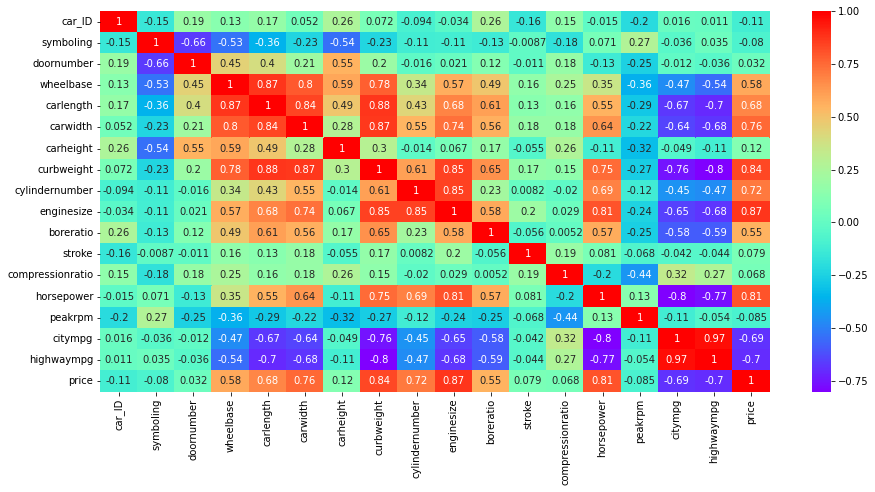

In [1031]:
plt.figure(figsize=(15,7))
sns.heatmap(dfcar_price.corr(), cmap="rainbow", annot=True)
plt.show()